In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

This was project made for data analysis course with Python. Task was following:

'In this project, you have to do the following EDA steps in a single Jupyter notebook file and then submit your file here. Besides, you have to write your impression of the result of the code in a single Microsoft Word or PDF file for those steps marked with an asterisk and then submit it as well:

Load the dataset into a Pandas DataFrame.
Check all column names with their data types. Modify the data type of features if needed.
The feature ‘RefId’ is not informative. Please eliminate it from the Data Frame.
(*) Extract Descriptive statistics of each feature of the dataset.
Correct the incorrect values and categories in case there exists any.
Do outlier detection.
Handle missing values.
Compute the average of the ‘VehBcost’ feature.
By using .query method, retrieve a table with contains green medium-size cars.
Compute the average price (‘VehBcost’) for each class in the ‘Make’ feature.
(*) Use Pandas .crosstab method to investigate the percentage of each of good buy and Bad buy classes (the feature ‘IsBadBuy’ ) in each ‘Nationality’ class.
(*) Use Pandas crosstab method to investigate if the vehicle's odometer can affect the buyer's satisfaction or dissatisfaction with its purchases. Do a similar investigation for features ‘Make’, ‘Color’, ‘Transmission’ and ‘Auction’ features.
Create the histogram plot of these features:   'MMRAcquisitionAuctionAveragePrice' and 'VehicleAg'e.
Create  Bar chart plot of these features: 'IsBadBuy', 'Make'.
Create Pie chart of these features: 'WheelType', 'Transmission'.
Create a scatter plot and hexbins plot of these tuple of features: ('MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice'), ('VehBCost', 'VehOdo'), ('VehicleAge, VehOdo')
(*) Using the above plot, explain whether numerical features are correlated.
Perform Feature encoding for feature ‘Color’, ‘WheelType’.
Create the correlation matrix of continuous features of the dataset.
(*) Create the Heatmap plot of the correlation matrix of continuous features.'

# Loading dataset. 

In [3]:
dataset = pd.read_csv('Carvana.csv')

# Checking variables and modifing them.

In [4]:
print(dataset.info())
print(dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IsBadBuy                           72983 non-null  int64  
 1   Auction                            72983 non-null  object 
 2   VehicleAge                         72983 non-null  int64  
 3   Make                               72983 non-null  object 
 4   Color                              72975 non-null  object 
 5   Transmission                       72974 non-null  object 
 6   WheelType                          69809 non-null  object 
 7   VehOdo                             72983 non-null  int64  
 8   Nationality                        72978 non-null  object 
 9   Size                               72978 non-null  object 
 10  TopThreeAmericanName               72978 non-null  object 
 11  MMRAcquisitionAuctionAveragePrice  72965 non-null  flo

Changed IsBadBuy to category since it is 'yes' or 'no'. Also other 'object' datatypes were changed to 'category' because they are categories.

In [30]:
dataset["IsBadBuy"] = dataset["IsBadBuy"].astype('category')
for i in dataset:
    if dataset[str(i)].dtypes == 'object':
        dataset[str(i)] = dataset[str(i)].astype('category')
print(dataset.info())      

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71828 entries, 0 to 72982
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   IsBadBuy                           71828 non-null  category
 1   Auction                            71828 non-null  category
 2   VehicleAge                         71828 non-null  int64   
 3   Make                               71828 non-null  category
 4   Color                              71828 non-null  category
 5   Transmission                       71828 non-null  category
 6   WheelType                          71828 non-null  category
 7   VehOdo                             71828 non-null  int64   
 8   Nationality                        71828 non-null  category
 9   Size                               71828 non-null  category
 10  TopThreeAmericanName               71828 non-null  category
 11  MMRAcquisitionAuctionAveragePrice  71828 

# Descriptive statistics for numerical variables.

In [6]:
dataset.describe()

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,VehBCost
count,72983.000000,72983.000000,72965.000000,72965.000000,72965.000000,72983.000000
mean,4.176644,71499.995917,6128.909217,7373.636031,8497.034332,6730.934326
std,1.712210,14578.913128,2461.992768,2722.491986,3156.285284,1767.846435
min,0.000000,4825.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,61837.000000,4273.000000,5406.000000,6280.000000,5435.000000
50%,4.000000,73361.000000,6097.000000,7303.000000,8444.000000,6700.000000
75%,5.000000,82436.000000,7765.000000,9021.000000,10651.000000,7900.000000
max,9.000000,115717.000000,35722.000000,36859.000000,39080.000000,45469.000000


# And for categorial variables.

In [7]:
dataset.describe(include=['category'])

,IsBadBuy,Auction,Make,Color,Transmission,WheelType,Nationality,Size,TopThreeAmericanName,PRIMEUNIT,AUCGUART
count,72983,72983,72983,72975,72974,69809,72978,72978,72978,3419,3419
unique,2,3,33,16,3,3,4,12,4,2,2
top,0,MANHEIM,CHEVROLET,SILVER,AUTO,Alloy,AMERICAN,MEDIUM,GM,NO,GREEN
freq,64007,41043,17248,14875,70398,36050,61028,30785,25314,3357,3340


# Looking for incorrect and missing values. 

In [8]:
print(dataset.isnull().sum())
print(round(dataset.isnull().sum()/72983, ndigits=2))

IsBadBuy                                 0
Auction                                  0
VehicleAge                               0
Make                                     0
Color                                    8
Transmission                             9
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
PRIMEUNIT                            69564
AUCGUART                             69564
VehBCost                                 0
dtype: int64
IsBadBuy                             0.00
Auction                              0.00
VehicleAge                           0.00
Make                                 0.00
Color                                0.00
Transmission                         0.00
Whee

Dropping these two variables since large majority of values are missing.

In [9]:
dataset.drop(labels=['PRIMEUNIT','AUCGUART'],axis=1, inplace= True)

Dropping missing values from these variables because of their very small number.

In [10]:
dataset.dropna(subset=['Nationality','Color','Transmission','Size','TopThreeAmericanName','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice'], inplace= True)

There is 3174 missing values in 'WheelType' (3 different classes). Missing values can be renamed as 'Other' wheel type.

In [11]:
dataset.WheelType.replace({None: 'Other'}, inplace= True)

Checking that missing values are removed.

In [12]:
print(dataset.isnull().sum())
print(dataset.info())

IsBadBuy                             0
Auction                              0
VehicleAge                           0
Make                                 0
Color                                0
Transmission                         0
WheelType                            0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
VehBCost                             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 72951 entries, 0 to 72982
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   IsBadBuy                           72951 non-null  category
 1   Auction                            72951 non-null  category
 2   VehicleAge                  

Incorret values in categorial variables. There is 'Manual' and 'MANUAL' classes in 'Transmission' variable. Those need to be combined. Also there is 'Toyota' and 'Toyota Scion' in 'Make' variable. Those are also combined.

In [13]:
print(dataset.IsBadBuy.value_counts())
print(dataset.Color.value_counts())
print(dataset.WheelType.value_counts())
print(dataset.Make.value_counts())
print(dataset.Transmission.value_counts())
print(dataset.Size.value_counts())
print(dataset.TopThreeAmericanName.value_counts())
print(dataset.Auction.value_counts())
print(dataset.Nationality.value_counts())

dataset.Transmission.replace({'Manual': 'MANUAL'}, inplace= True)
dataset.Make.replace({'TOYOTA SCION': 'TOYOTA'}, inplace= True)

0    63977
1     8974
Name: IsBadBuy, dtype: int64
SILVER       14872
WHITE        12117
BLUE         10344
GREY          7882
BLACK         7623
RED           6256
GOLD          5231
GREEN         3192
MAROON        2046
BEIGE         1584
BROWN          436
ORANGE         415
PURPLE         373
YELLOW         244
OTHER          242
NOT AVAIL       94
Name: Color, dtype: int64
Alloy      36032
Covers     32998
Other       3166
Special      755
Name: WheelType, dtype: int64
CHEVROLET       17245
DODGE           12903
FORD            11302
CHRYSLER         8843
PONTIAC          4257
KIA              2484
SATURN           2163
NISSAN           2078
HYUNDAI          1810
JEEP             1641
SUZUKI           1328
TOYOTA           1144
MITSUBISHI       1030
MAZDA             979
MERCURY           911
BUICK             720
GMC               647
HONDA             497
OLDSMOBILE        243
VOLKSWAGEN        134
ISUZU             134
SCION             129
LINCOLN            97
INFINITI       

# Outlier detection.

Univariate outlier detection. Features were scaled because 'VehicleAge' was very different scale with others. Standardization was used because it remains outliers. After standardization boxplot names disappear but
we know that first box without outliers is 'VehicleAge'.

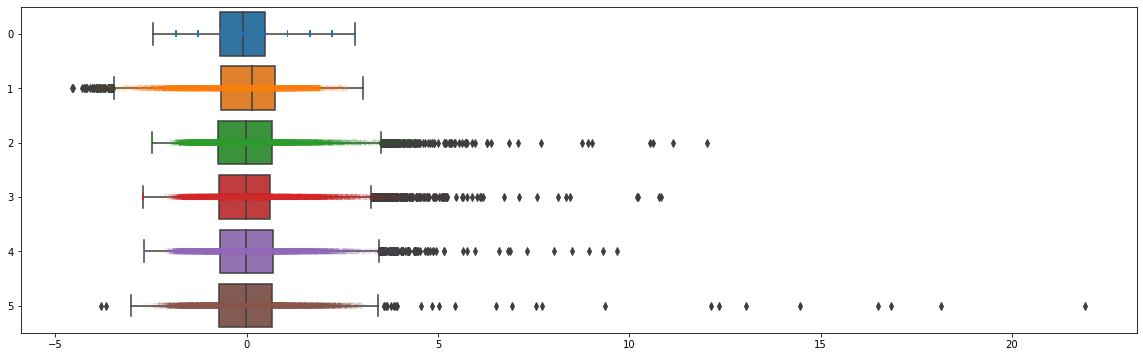

In [14]:
fig_dims = (20,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(data = pd.DataFrame(data= StandardScaler().fit_transform(dataset.iloc[:,[2,7,11,12,13,14]])),orient = "h", whis =2)
ax = sns.stripplot(data=pd.DataFrame(data= StandardScaler().fit_transform(dataset.iloc[:,[2,7,11,12,13,14]])),orient = 'h', jitter=0.05,size = 1, alpha = 0.2 )

plt.show()

Removing outliers in terms of IQR.

In [15]:
names = []
for i in [7,11,12,13,14]: 
    names.append(dataset.columns[i])

Q1=[]
Q3=[]
IQR=[]

for i, j in enumerate(names):
    Q1.append(dataset[j].quantile(.25))
    Q3.append(dataset[j].quantile(.75))
    IQR.append(Q3[i]-Q1[i])

for i, j in enumerate(names):
    true_index = (dataset[j] >= (Q1[i] - 2 * IQR[i])) & (dataset[j] <=(Q3[i] + 2 * IQR[i]))
    dataset = dataset.loc[true_index] 

Checking that outliers are removed.

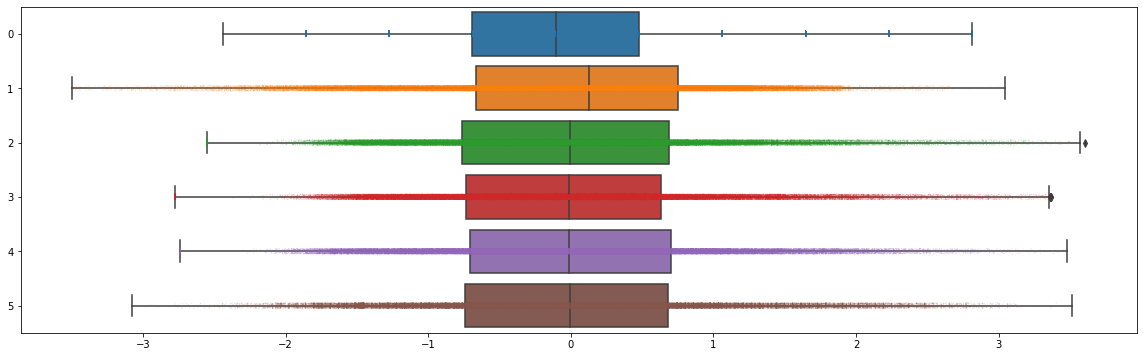

In [16]:
fig_dims = (20,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(data = pd.DataFrame(data= StandardScaler().fit_transform(dataset.iloc[:,[2,7,11,12,13,14]])),orient = "h", whis =2)
ax = sns.stripplot(data=pd.DataFrame(data= StandardScaler().fit_transform(dataset.iloc[:,[2,7,11,12,13,14]])),orient = 'h', jitter=0.05,size = 1, alpha = 0.2 )

plt.show()

Multivariate outlier detection. Looks like there is lot of zeros in 'MMRA...' variables. 

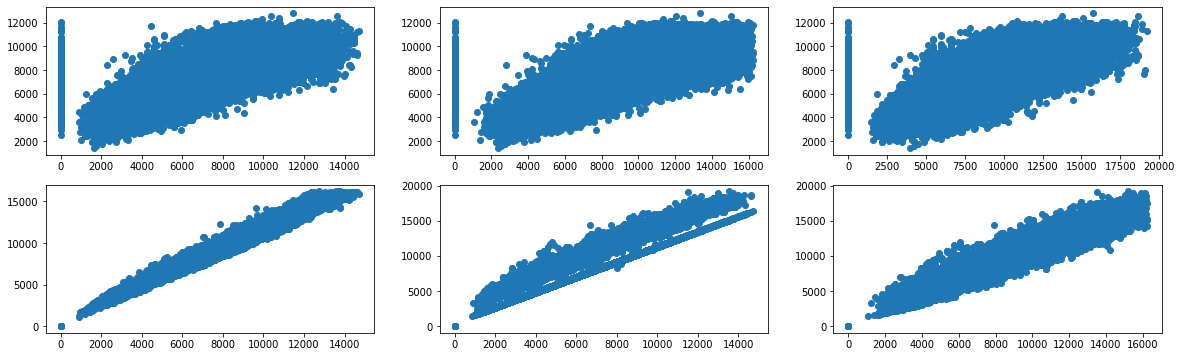

In [17]:
fig, ax = plt.subplots(2,3,figsize=fig_dims)
ax[0,0].scatter(dataset["MMRAcquisitionAuctionAveragePrice"], dataset["VehBCost"])
ax[0,1].scatter(dataset["MMRAcquisitionAuctionCleanPrice"], dataset["VehBCost"])
ax[0,2].scatter(dataset["MMRAcquisitionRetailAveragePrice"], dataset["VehBCost"])
ax[1,0].scatter(dataset["MMRAcquisitionAuctionAveragePrice"], dataset["MMRAcquisitionAuctionCleanPrice"])
ax[1,1].scatter(dataset["MMRAcquisitionAuctionAveragePrice"], dataset["MMRAcquisitionRetailAveragePrice"])
ax[1,2].scatter(dataset["MMRAcquisitionAuctionCleanPrice"], dataset["MMRAcquisitionRetailAveragePrice"])
plt.show()

Counting how many zeros there is in 'MMRA...' variables.

In [18]:
counter1 = 0
for i in dataset["MMRAcquisitionAuctionAveragePrice"]:
    if i == 0:
        counter1 += 1
print(counter1)

counter2 = 0
for i in dataset["MMRAcquisitionAuctionCleanPrice"]:
    if i == 0:
        counter2 += 1
print(counter2)

counter3 = 0
for i in dataset["MMRAcquisitionRetailAveragePrice"]:
    if i == 0:
        counter3 += 1
print(counter3)

825
694
825


Zeros are in same rows so they can be removed. We will remove only 1% of data so that is not a problem.


In [19]:
len(dataset[(dataset["MMRAcquisitionAuctionAveragePrice"]==0)|(dataset["MMRAcquisitionAuctionCleanPrice"]==0)|(dataset["MMRAcquisitionRetailAveragePrice"]==0)])

825

Removing multivariate outliers.


In [20]:
dataset.drop(dataset.index[dataset['MMRAcquisitionAuctionAveragePrice'] == 0], inplace = True)
dataset.drop(dataset.index[dataset['MMRAcquisitionAuctionCleanPrice'] == 0], inplace = True)
dataset.drop(dataset.index[dataset['MMRAcquisitionRetailAveragePrice'] == 0], inplace = True)

Checking that multivariate outliers are removed.

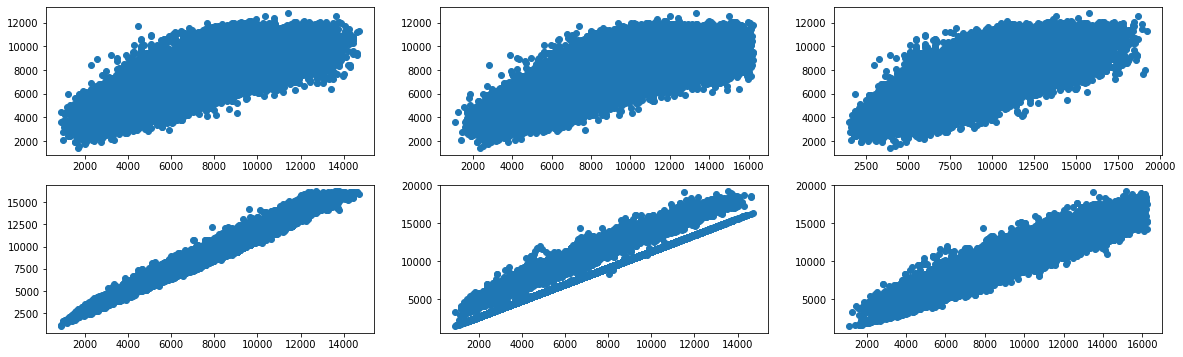

In [21]:
fig, ax = plt.subplots(2,3,figsize=fig_dims)
ax[0,0].scatter(dataset["MMRAcquisitionAuctionAveragePrice"], dataset["VehBCost"])
ax[0,1].scatter(dataset["MMRAcquisitionAuctionCleanPrice"], dataset["VehBCost"])
ax[0,2].scatter(dataset["MMRAcquisitionRetailAveragePrice"], dataset["VehBCost"])
ax[1,0].scatter(dataset["MMRAcquisitionAuctionAveragePrice"], dataset["MMRAcquisitionAuctionCleanPrice"])
ax[1,1].scatter(dataset["MMRAcquisitionAuctionAveragePrice"], dataset["MMRAcquisitionRetailAveragePrice"])
ax[1,2].scatter(dataset["MMRAcquisitionAuctionCleanPrice"], dataset["MMRAcquisitionRetailAveragePrice"])
plt.show()

# Data exploration.

Average of 'VehBCost'.

In [22]:
print("Average of 'VehBcost': ",round(dataset.VehBCost.sum()/len(dataset.VehBCost)))

Average of 'VehBcost':  6713


Green medium-size cars.


In [23]:
dataset.query('Color=="GREEN" and Size=="MEDIUM"')

,IsBadBuy,Auction,VehicleAge,Make,Color,Transmission,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,VehBCost
90,0,ADESA,6,NISSAN,GREEN,AUTO,Covers,65379,TOP LINE ASIAN,MEDIUM,OTHER,4704.0,5612.0,7671.0,7700.0
129,0,ADESA,4,PONTIAC,GREEN,AUTO,Alloy,70741,AMERICAN,MEDIUM,GM,7146.0,8382.0,10398.0,6900.0
150,0,ADESA,6,CHRYSLER,GREEN,AUTO,Alloy,87775,AMERICAN,MEDIUM,CHRYSLER,3667.0,4575.0,7778.0,4600.0
165,0,ADESA,4,FORD,GREEN,AUTO,Alloy,85042,AMERICAN,MEDIUM,FORD,4872.0,5998.0,8066.0,4600.0
202,0,ADESA,6,CHEVROLET,GREEN,AUTO,Alloy,94011,AMERICAN,MEDIUM,GM,4759.0,6083.0,7680.0,5900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72690,0,ADESA,3,PONTIAC,GREEN,AUTO,Alloy,86549,AMERICAN,MEDIUM,GM,9261.0,10983.0,10502.0,7500.0
72692,0,ADESA,2,PONTIAC,GREEN,AUTO,Alloy,74194,AMERICAN,MEDIUM,GM,7766.0,8815.0,8887.0,7100.0
72796,0,ADESA,6,OLDSMOBILE,GREEN,AUTO,Covers,71544,AMERICAN,MEDIUM,GM,2880.0,4195.0,3610.0,4000.0
72803,0,ADESA,4,CHRYSLER,GREEN,AUTO,Alloy,82086,AMERICAN,MEDIUM,CHRYSLER,3827.0,5054.0,4633.0,5350.0


Average cost of 'VehBCost' for 'Make' classes (vehicles price by car company).

In [24]:
make = dataset.groupby('Make')
round(make['VehBCost'].mean())

Make
ACURA         8913.0
BUICK         6160.0
CADILLAC      9840.0
CHEVROLET     6826.0
CHRYSLER      6498.0
DODGE         7037.0
FORD          6367.0
GMC           8340.0
HONDA         8342.0
HYUNDAI       5971.0
INFINITI      8937.0
ISUZU         7617.0
JEEP          7895.0
KIA           6004.0
LEXUS         9500.0
LINCOLN       7646.0
MAZDA         7039.0
MERCURY       6210.0
MINI          8421.0
MITSUBISHI    6623.0
NISSAN        7761.0
OLDSMOBILE    4456.0
PLYMOUTH      3350.0
PONTIAC       6591.0
SATURN        5607.0
SCION         7461.0
SUBARU        8830.0
SUZUKI        5360.0
TOYOTA        8252.0
VOLKSWAGEN    7677.0
VOLVO         9751.0
Name: VehBCost, dtype: float64

'IsBadBuy' vs 'Nationality'. 1 means bad and 0 not bad buy. 

In [25]:
pd.crosstab(dataset.IsBadBuy, dataset.Nationality, margins= True)

Nationality,AMERICAN,OTHER,OTHER ASIAN,TOP LINE ASIAN,All
IsBadBuy,,,,,
0,52884,165,6830,3155,63034
1,7255,25,1029,485,8794
All,60139,190,7859,3640,71828


Crosstab with IsBadBuy vs car company, color of a car, transmission type and auction.


In [26]:
print(pd.crosstab(dataset.IsBadBuy, pd.cut(x = dataset['VehOdo'], bins = 4, labels = [1,2,3,4]), margins= True, normalize=True))
print(pd.crosstab(dataset.IsBadBuy, dataset.Make, margins= True, normalize=True))
print(pd.crosstab(dataset.IsBadBuy, dataset.Color, margins= True, normalize=True))
print(pd.crosstab(dataset.IsBadBuy, dataset.Transmission, margins= True, normalize=True))
print(pd.crosstab(dataset.IsBadBuy, dataset.Auction, margins= True, normalize=True))

VehOdo           1         2         3         4       All
IsBadBuy                                                  
0         0.038801  0.298922  0.494988  0.044857  0.877569
1         0.002924  0.032244  0.076516  0.010748  0.122431
All       0.041725  0.331166  0.571504  0.055605  1.000000
Make         ACURA     BUICK  CADILLAC  CHEVROLET  CHRYSLER     DODGE  \
IsBadBuy                                                                
0         0.000320  0.008423  0.000376   0.214206  0.105878  0.159186   
1         0.000125  0.001559  0.000042   0.023139  0.015454  0.018335   
All       0.000446  0.009982  0.000418   0.237345  0.121332  0.177521   

Make          FORD       GMC     HONDA   HYUNDAI  ...  PLYMOUTH   PONTIAC  \
IsBadBuy                                          ...                       
0         0.130186  0.007615  0.006056  0.021844  ...  0.000014  0.051582   
1         0.023723  0.001016  0.000738  0.003244  ...  0.000014  0.006891   
All       0.153909  0.008632  0

Histogram about estimated  prices and ages of cars.

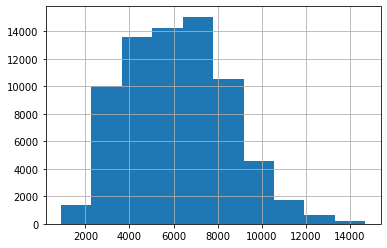

In [27]:
dataset['MMRAcquisitionAuctionAveragePrice'].hist()

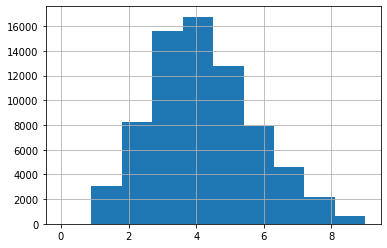

In [28]:
dataset['VehicleAge'].hist()

Bar charts about value counts of 'IsBadBuy', and amount of different companies cars.

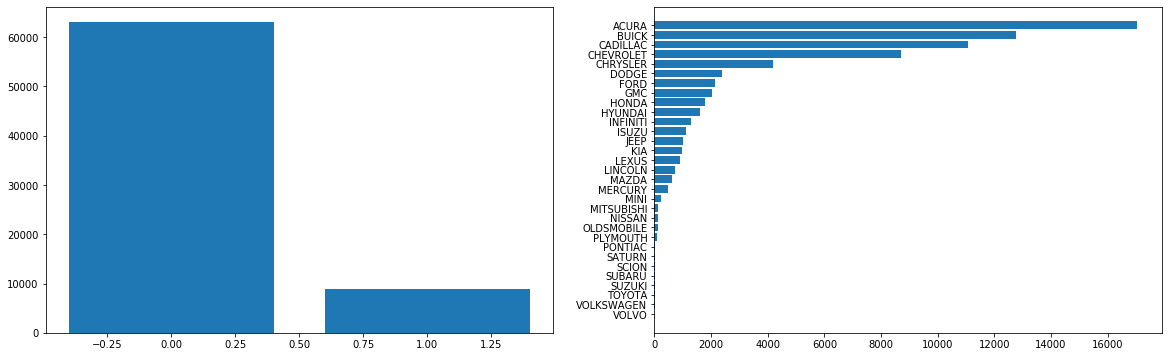

In [31]:
fig, ax = plt.subplots(1,2,figsize=fig_dims)
ax[0].bar(dataset['IsBadBuy'].cat.categories,dataset['IsBadBuy'].value_counts())
ax[1].barh(dataset['Make'].cat.categories,dataset['Make'].value_counts())
ax[1].invert_yaxis()
plt.show()

Pie charts about type of wheel and transmission of cars.

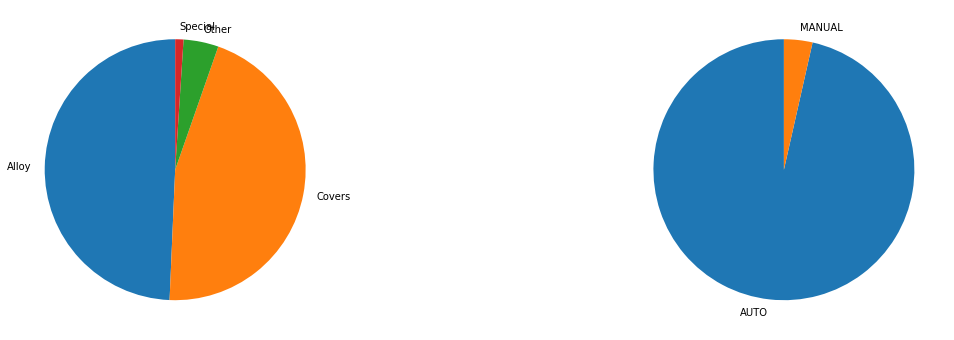

In [32]:
fig, ax = plt.subplots(1,2,figsize=fig_dims)
ax[0].pie(dataset['WheelType'].value_counts(), labels = dataset['WheelType'].cat.categories,  shadow=False, startangle=90)
ax[1].pie(dataset['Transmission'].value_counts(), labels = dataset['Transmission'].cat.categories,  shadow=False, startangle=90)
plt.show()

Scatter and hexbin plots

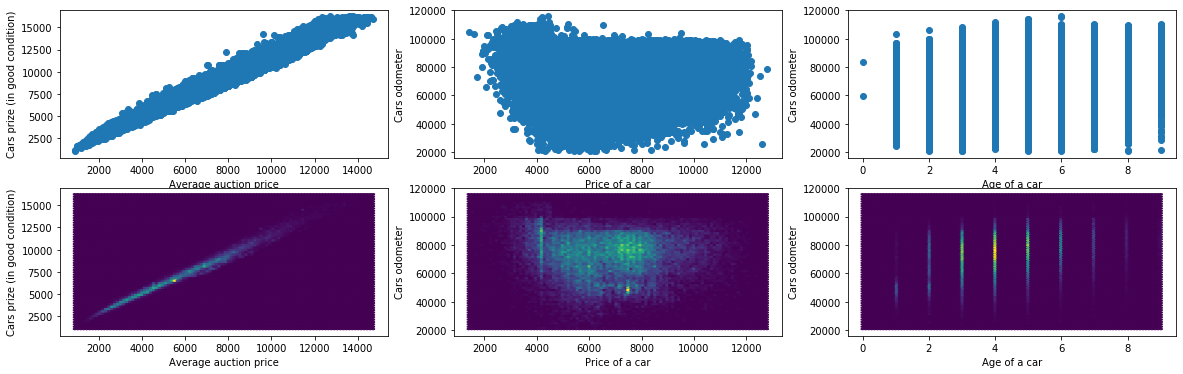

In [33]:
fig, ax = plt.subplots(2,3,figsize=fig_dims, sharey = False, sharex = False)
ax[0,0].scatter(dataset["MMRAcquisitionAuctionAveragePrice"], dataset["MMRAcquisitionAuctionCleanPrice"])
ax[0,0].set_xlabel('Average auction price')
ax[0,0].set_ylabel('Cars prize (in good condition)')
ax[0,1].scatter(dataset['VehBCost'], dataset['VehOdo'])
ax[0,1].set_xlabel('Price of a car')
ax[0,1].set_ylabel('Cars odometer')
ax[0,2].scatter(dataset['VehicleAge'], dataset['VehOdo'])
ax[0,2].set_xlabel('Age of a car')
ax[0,2].set_ylabel('Cars odometer')
ax[1,0].hexbin(dataset["MMRAcquisitionAuctionAveragePrice"],dataset["MMRAcquisitionAuctionCleanPrice"], cmap = 'viridis')
ax[1,0].set_xlabel('Average auction price')
ax[1,0].set_ylabel('Cars prize (in good condition)')
ax[1,1].hexbin(dataset['VehBCost'], dataset['VehOdo'], cmap = 'viridis')
ax[1,1].set_xlabel('Price of a car')
ax[1,1].set_ylabel('Cars odometer')
ax[1,2].hexbin(dataset['VehicleAge'], dataset['VehOdo'], cmap = 'viridis')
ax[1,2].set_xlabel('Age of a car')
ax[1,2].set_ylabel('Cars odometer')
plt.show()

Feature encoding of car color and wheel type categories (for possible ML models).

In [34]:
datasetnew = pd.get_dummies(dataset['Color'])
dataset = pd.concat([dataset, datasetnew],axis=1)
dataset = dataset.drop(['Color'], axis =1) 

datasetnew = pd.get_dummies(dataset['WheelType'])
dataset = pd.concat([dataset, datasetnew],axis=1)
dataset = dataset.drop(['WheelType'], axis =1) 

dataset.head()

,IsBadBuy,Auction,VehicleAge,Make,Transmission,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,...,OTHER,PURPLE,RED,SILVER,WHITE,YELLOW,Alloy,Covers,Other,Special
0,0,ADESA,3,MAZDA,AUTO,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,...,0,0,1,0,0,0,1,0,0,0
1,0,ADESA,5,DODGE,AUTO,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,...,0,0,0,0,1,0,1,0,0,0
2,0,ADESA,4,DODGE,AUTO,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,...,0,0,0,0,0,0,0,1,0,0
3,0,ADESA,5,DODGE,AUTO,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,...,0,0,0,1,0,0,1,0,0,0
4,0,ADESA,4,FORD,MANUAL,69367,AMERICAN,COMPACT,FORD,3913.0,...,0,0,0,1,0,0,0,1,0,0


Correlation matrix.

In [35]:
dataset.iloc[:, [2,5,9,10,11,12]].corr()

,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,VehBCost
VehicleAge,1.000000,0.323657,-0.598913,-0.552531,-0.486790,-0.313900
VehOdo,0.323657,1.000000,-0.020137,0.024633,0.031705,-0.060457
MMRAcquisitionAuctionAveragePrice,-0.598913,-0.020137,1.000000,0.989358,0.898489,0.823266
MMRAcquisitionAuctionCleanPrice,-0.552531,0.024633,0.989358,1.000000,0.888713,0.821258
MMRAcquisitionRetailAveragePrice,-0.486790,0.031705,0.898489,0.888713,1.000000,0.780728
VehBCost,-0.313900,-0.060457,0.823266,0.821258,0.780728,1.000000


Heartmap plot of correlation matrix.

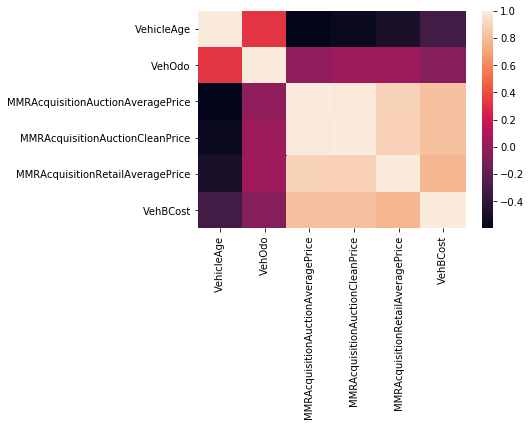

In [36]:
sns_plot = sns.heatmap(dataset.iloc[:, [2,5,9,10,11,12]].corr())
sns_plot.figure.savefig('filename.png', dpi = 400)